# Imports

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

# Fetching Summary Report Data

In [2]:
df = pd.read_csv("../Test/Results/SummaryReportQuickSort.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timeStamp        30000 non-null  int64  
 1   elapsed          30000 non-null  int64  
 2   label            30000 non-null  object 
 3   responseCode     30000 non-null  object 
 4   responseMessage  30000 non-null  object 
 5   threadName       30000 non-null  object 
 6   dataType         30000 non-null  object 
 7   success          30000 non-null  bool   
 8   failureMessage   0 non-null      float64
 9   bytes            30000 non-null  int64  
 10  sentBytes        30000 non-null  int64  
 11  grpThreads       30000 non-null  int64  
 12  allThreads       30000 non-null  int64  
 13  URL              30000 non-null  object 
 14  Latency          30000 non-null  int64  
 15  IdleTime         30000 non-null  int64  
 16  Connect          30000 non-null  int64  
dtypes: bool(1), 

# Separating completed requests and cancelled requests

In [14]:
completed_requests_df = df[df['success'] == True]
cancelled_requests_df = df[df['success'] == False]

In [18]:
completed_requests_df.groupby(['allThreads'])['elapsed'].mean()

allThreads
1         287.000000
2         285.000000
3         304.000000
4         324.000000
5         328.000000
            ...     
992      5151.000000
993      5044.400000
994      4703.000000
999     10259.205882
1000     7495.627794
Name: elapsed, Length: 899, dtype: float64

In [26]:
completed_requests_df.groupby(['allThreads'])['elapsed'].describe()

,count,mean,std,min,25%,50%,75%,max
allThreads,,,,,,,,
1,1.0,287.000000,NaN,287.0,287.0,287.0,287.0,287.0
2,1.0,285.000000,NaN,285.0,285.0,285.0,285.0,285.0
3,1.0,304.000000,NaN,304.0,304.0,304.0,304.0,304.0
4,1.0,324.000000,NaN,324.0,324.0,324.0,324.0,324.0
5,1.0,328.000000,NaN,328.0,328.0,328.0,328.0,328.0
...,...,...,...,...,...,...,...,...
992,1.0,5151.000000,NaN,5151.0,5151.0,5151.0,5151.0,5151.0
993,5.0,5044.400000,170.061165,4741.0,5109.0,5109.0,5124.0,5139.0
994,1.0,4703.000000,NaN,4703.0,4703.0,4703.0,4703.0,4703.0


In [19]:
cancelled_requests_df.groupby(['allThreads'])['elapsed'].mean()

allThreads
612     5933.727273
613     7288.000000
614     6019.000000
615     6139.076923
616     5755.500000
           ...     
996     7529.333333
997     7569.727273
998     7649.600000
999     7764.100000
1000    6817.114499
Name: elapsed, Length: 92, dtype: float64

In [27]:
cancelled_requests_df.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
1156,1682687465731,9963,Asking for array to be sorted,Non HTTP response code: java.net.SocketException,Non HTTP response message: Connection reset,Sorter Lovers 1-304,text,False,NaN,2599,0,1000,1000,http://localhost:3000,0,0,0
1157,1682687466072,9626,Asking for array to be sorted,Non HTTP response code: java.net.SocketException,Non HTTP response message: Connection reset,Sorter Lovers 1-208,text,False,NaN,2599,0,1000,1000,http://localhost:3000,0,0,0
1158,1682687465788,9907,Asking for array to be sorted,Non HTTP response code: java.net.SocketException,Non HTTP response message: Connection reset,Sorter Lovers 1-129,text,False,NaN,2599,0,1000,1000,http://localhost:3000,0,0,0
1159,1682687465556,10137,Asking for array to be sorted,Non HTTP response code: java.net.SocketException,Non HTTP response message: Connection reset,Sorter Lovers 1-265,text,False,NaN,2599,0,1000,1000,http://localhost:3000,0,0,0
1160,1682687466013,9683,Asking for array to be sorted,Non HTTP response code: java.net.SocketException,Non HTTP response message: Connection reset,Sorter Lovers 1-21,text,False,NaN,2599,0,1000,1000,http://localhost:3000,0,0,0


In [25]:
cancelled_requests_df.groupby(['allThreads'])['elapsed'].describe()

,count,mean,std,min,25%,50%,75%,max
allThreads,,,,,,,,
612,11.0,5933.727273,491.449100,5311.0,5533.00,5956.0,6196.00,6906.0
613,1.0,7288.000000,NaN,7288.0,7288.00,7288.0,7288.00,7288.0
614,1.0,6019.000000,NaN,6019.0,6019.00,6019.0,6019.00,6019.0
615,13.0,6139.076923,513.703459,5371.0,5837.00,6039.0,6437.00,7071.0
616,2.0,5755.500000,259.508189,5572.0,5663.75,5755.5,5847.25,5939.0
...,...,...,...,...,...,...,...,...
996,9.0,7529.333333,38.525965,7475.0,7497.00,7539.0,7549.00,7598.0
997,11.0,7569.727273,45.675137,7501.0,7539.00,7570.0,7606.50,7636.0
998,5.0,7649.600000,18.036075,7624.0,7641.00,7651.0,7662.00,7670.0


In [22]:
total_observations = df.shape[0]
cancelled_observations = cancelled_requests_df.shape[0]

cancelled_observations / total_observations

0.19363333333333332

Here we'll take look at the allThreads and elapsed columns.
- allThreads: number of active threads (which represents users in our case) in the instant the request was started.
- elapsed: How long it took to get a response back or to get request cancelled.

# Plotting

Text(0, 0.5, 'Latency')

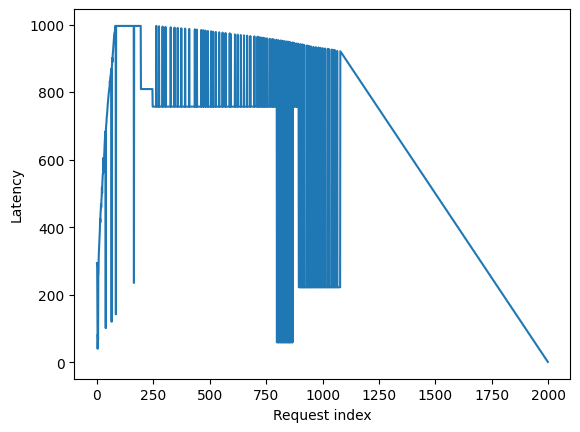

In [49]:
plt.plot(range(0, sorted_df.shape[0]), sorted_df['allThreads'])
plt.xlabel('Request index')
plt.ylabel('Latency')